In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/AKAM_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2/1/2019,AKAM,65.519997,65.519997,65.540001,64.500000,65.000000,1426900
1,2/4/2019,AKAM,67.040001,67.040001,67.080002,65.589996,65.589996,1146300
2,2/5/2019,AKAM,68.169998,68.169998,68.300003,67.279999,67.309998,1474300
3,2/6/2019,AKAM,67.510002,67.510002,68.500000,67.480003,68.089996,1379200
4,2/7/2019,AKAM,66.589996,66.589996,67.150002,65.889999,67.110001,1047600
...,...,...,...,...,...,...,...,...
1290,3/19/2024,AKAM,107.790001,107.790001,107.849998,106.809998,107.320000,1326800
1291,3/20/2024,AKAM,109.599998,109.599998,109.639999,107.699997,107.849998,1809500
1292,3/21/2024,AKAM,109.150002,109.150002,110.180000,109.059998,109.669998,1123100
1293,3/22/2024,AKAM,108.970001,108.970001,109.959999,108.550003,109.930000,949700


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3685.116, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3685.465, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3687.455, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3687.453, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3683.638, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3683.550, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3684.995, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3685.024, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3685.898, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3686.227, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3682.078, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3685.625, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3685.626, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3683.249, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88.81175779 88.96173641 89.10079493 89.22972846 89.3492742  89.4601157
 89.56288671 89.65817486 89.74652498 89.82844224 89.90439501 89.97481759
 90.04011263 90.10065347 90.15678626 90.20883197 90.25708818 90.3018308
 90.34331567 90.38177998 90.41744367 90.45051064 90.48116998 90.50959698
 90.53595417 90.56039228 90.58305102 90.60405995 90.6235392  90.64160015]


In [7]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 23.119113143814538
Testing RMSE: 8.674477508775604


Validation RMSE: 23.119113143814538
Testing RMSE: 8.674477508775604


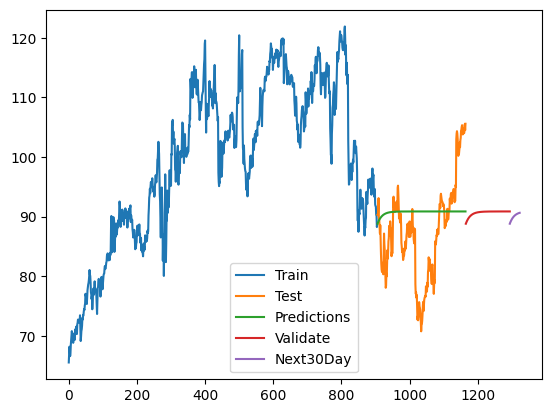

In [8]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=906, stop=1165, step=1)

In [10]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 23.119113143814538
Testing RMSE: 8.674477508775604
Validation MAPE: 19.455518381147087
Testing MAPE: 8.08305420788152
Validation MDA: 53.48837209302325
Testing MDA: 51.55038759689923
